# <center>DATASET DE NOTICIAS</center>

#### <center>Diego Camilo Peña Ramírez</center>
#### <center>C.C: 1015409026</center>


### CONTEXTO

Este DataSet contiene alrededor de 200 mil titulares de noticias del año 2012 al 2018 obtenidos de HuffPost. El modelo entrenado en este conjunto de datos podría usarse para identificar etiquetas para artículos de noticias no rastreados o para identificar el tipo de lenguaje utilizado en diferentes artículos de noticias.

¿Se pueden catalogar las noticias con la descripción y los titulares? Compare su clasificación con las categorías incluidas en el set de datos.

¿Existen estilos de escritura asociados a cada categoría?

¿Qué se puede decir de los autores?

¿Qué información útil se puede extraer de los datos?

### CONTENIDO

Cada titular de noticias tiene una categoría correspondiente. Las categorías y los recuentos de artículos correspondientes son los siguientes:

POLITICS: 32739

WELLNESS: 17827

ENTERTAINMENT: 16058

TRAVEL: 9887

STYLE & BEAUTY: 9649

PARENTING: 8677

HEALTHY LIVING: 6694

QUEER VOICES: 6314

FOOD & DRINK: 6226

BUSINESS: 5937

COMEDY: 5175

SPORTS: 4884

BLACK VOICES: 4528

HOME & LIVING: 4195

PARENTS: 3955

THE WORLDPOST: 3664

WEDDINGS: 3651

WOMEN: 3490

IMPACT: 3459

DIVORCE: 3426

CRIME: 3405

MEDIA: 2815

WEIRD NEWS: 2670

GREEN: 2622

WORLDPOST: 2579

RELIGION: 2556

STYLE: 2254

SCIENCE: 2178

WORLD NEWS: 2177

TASTE: 2096

TECH: 2082

MONEY: 1707

ARTS: 1509

FIFTY: 1401

GOOD NEWS: 1398

ARTS & CULTURE: 1339

ENVIRONMENT: 1323

COLLEGE: 1144

LATINO VOICES: 1129

CULTURE & ARTS: 1030

EDUCATION: 1004

### IMPORTAR LIBRERIAS

Importamos las librerias necesarias:

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import sklearn
from fastai.text import *
from wordcloud import WordCloud
from nltk.corpus import stopwords
from pylab import rcParams
from tqdm import tqdm_notebook
np.random.seed(500)
import warnings
from sklearn.utils.testing import ignore_warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(ngram_range=(1,3))
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.svm import LinearSVC
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import html
from nltk.stem import SnowballStemmer
import re
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nerve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nerve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nerve\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nerve\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### CARGANDO DE DATOS

Empezamos por cargar los datos y  almacenarlos en un dataframe:

In [3]:
df = pd.read_json('News_Category_Dataset_v2.json', lines=True)

In [4]:
df

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


### LIMPIANDO LOS DATOS:

Debido que dentro de los datos hay cadenas de caracteres vacías, reemplazamos dichas cadenas por datos nulos:

In [5]:
df.replace('', np.nan, inplace=True)

In [6]:
df

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,NaN,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",NaN,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,NaN,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


Ahora contamos que datos hay nulos dentro del dataset:

In [7]:
df.isnull().sum()

category                 0
headline                 6
authors              36620
link                     0
short_description    19712
date                     0
dtype: int64

Y verificamos el promedio de dichos datos con respecto al data set:

In [8]:
df.isnull().mean()

category             0.000000
headline             0.000030
authors              0.182322
link                 0.000000
short_description    0.098141
date                 0.000000
dtype: float64

Las columnas 'authors' y 'short_description', poseen aproximadamente un 18% y 10% de datos faltantes respectivamente, sin embargo como la pregunta esta relacionada con los autores y la descripción, procedemos a desechar los datos faltantes de dichas columnas.

Procedmos a desechar las filas con datos vacios del dataset:

In [9]:
df=df.dropna()

In [10]:
df

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200843,TECH,Good Games -- Is It possible?,"Mateo Gutierrez, Contributor\nArtist",https://www.huffingtonpost.com/entry/games-for...,I don't think people who play Zynga games are ...,2012-01-28
200844,TECH,Google+ Now Open for Teens With Some Safeguards,"Larry Magid, Contributor\nTechnology journalist",https://www.huffingtonpost.com/entry/google-pl...,"For the most part, teens' experience on Google...",2012-01-28
200845,TECH,Web Wars,"John Giacobbi, Contributor\nTales from the Int...",https://www.huffingtonpost.com/entry/congress-...,"These ""Web Wars"" threaten to rage on for some ...",2012-01-28
200847,TECH,Watch The Top 9 YouTube Videos Of The Week,Catharine Smith,https://www.huffingtonpost.com/entry/watch-top...,If you're looking to see the most popular YouT...,2012-01-28


Reiniciamos los indices:

In [11]:
df.reset_index(drop=True, inplace=True)
df

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
148978,TECH,Good Games -- Is It possible?,"Mateo Gutierrez, Contributor\nArtist",https://www.huffingtonpost.com/entry/games-for...,I don't think people who play Zynga games are ...,2012-01-28
148979,TECH,Google+ Now Open for Teens With Some Safeguards,"Larry Magid, Contributor\nTechnology journalist",https://www.huffingtonpost.com/entry/google-pl...,"For the most part, teens' experience on Google...",2012-01-28
148980,TECH,Web Wars,"John Giacobbi, Contributor\nTales from the Int...",https://www.huffingtonpost.com/entry/congress-...,"These ""Web Wars"" threaten to rage on for some ...",2012-01-28
148981,TECH,Watch The Top 9 YouTube Videos Of The Week,Catharine Smith,https://www.huffingtonpost.com/entry/watch-top...,If you're looking to see the most popular YouT...,2012-01-28


### ¿Se pueden catalogar las noticias con la descripción y los titulares?

Procedemos a graficar el número de titulares por categorias :

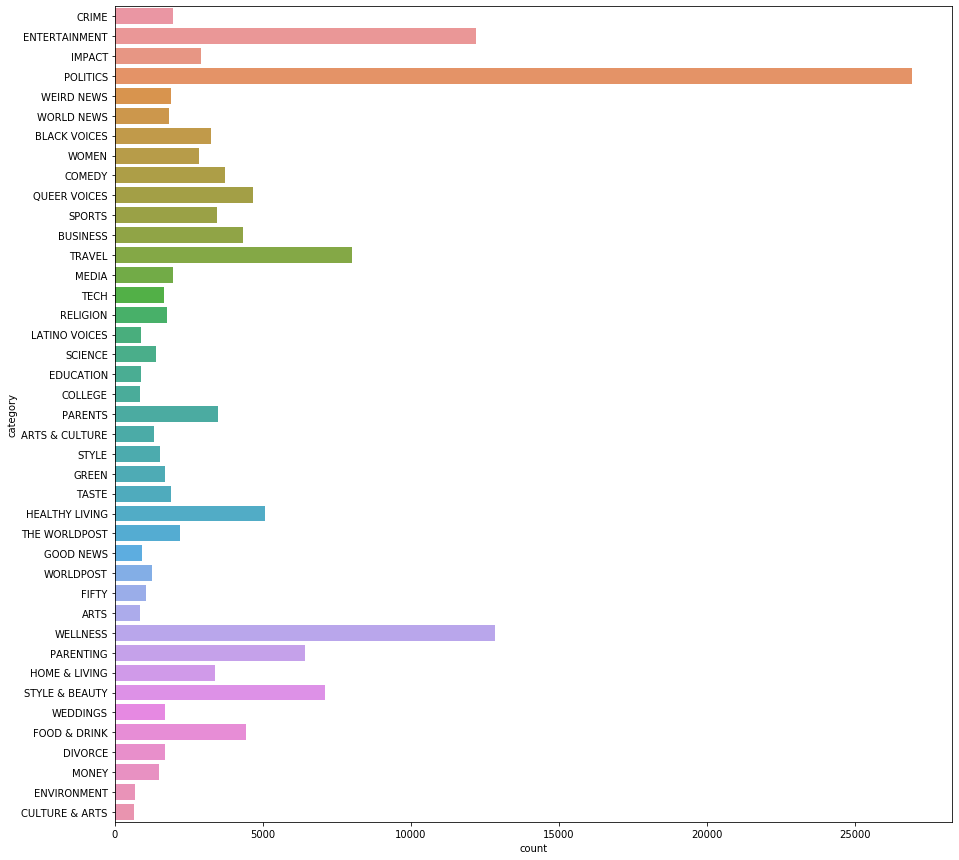

In [12]:
plt.figure(figsize=(15,15))
ax= sns.countplot(data=df, y = 'category')

De la gráfica anterior la categoría 'POLITICS' contiene la mayor cantidad de articulos, seguida de la categoría 'ENTERTAIMENT' y 'WELLNESS'. Procedemos entonces a analizar la descripción y los titulares de estas.

Procedemos a hacer un pre procesamiento de los datos:

In [13]:
def preprocessing(col,h_pct=1,l_pct=1):
    '''
    Cleans the text in the input column

    Parameters
    ----------
    col : pandas.core.series.Series
        The column which needs to be processed
    h_pct : float (default = 1)
        The percentage of high frequency words to remove from the corpus
    l_pct : float (default = 1)
        The percentage of low frequency words to remove from the corpus
    
    Returns
    -------
    cleaned text series
    '''
    #Lower case
    lower = col.apply(str.lower)
    
    #Removing HTML tags
    import html
    rem_html = lower.apply(lambda x: x.replace('#39;', "'").replace('amp;', '&')
                             .replace('#146;', "'").replace('nbsp;', ' ').replace('#36;', '$')
                             .replace('\\n', "\n").replace('quot;', "'").replace('<br />', " ")
                             .replace('\\"', '"').replace('<unk>','u_n').replace(' @.@ ','.')
                             .replace(' @-@ ','-').replace('\\', ' \\ ').replace('&lt;','<')
                             .replace('&gt;', '>'))
    
    #Lemmatizing
    from nltk.corpus import wordnet
    from nltk.stem import WordNetLemmatizer
    
    #Stemming
    from nltk.stem import SnowballStemmer
    stem = SnowballStemmer('english')
    stemmed = rem_html.apply(lambda x: ' '.join(stem.stem(word) for word in str(x).split()))
    
    #removing punctuation
    import re
    rem_punc = stemmed.apply(lambda x: re.sub(r'[^\w\s]',' ',x))
    
    #removing stopwords and extra spaces
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    rem_stopwords = rem_punc.apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
    
    #removing numbers
    rem_num = rem_stopwords.apply(lambda x: " ".join(x for x in x.split() if not x.isdigit()))
    
    #remove words having length=1
    rem_lngth1 = rem_num.apply(lambda x: re.sub(r'[^\w\s]',' ',x))
    
    if h_pct != 0:
        #removing the top $h_pct of the most frequent words 
        high_freq = pd.Series(' '.join(rem_lngth1).split()).value_counts()[:int(pd.Series(' '.join(rem_lngth1).split()).count()*h_pct/100)]
        rem_high = rem_lngth1.apply(lambda x: " ".join(x for x in x.split() if x not in high_freq))
    else:
        rem_high = rem_lngth1
    
    if l_pct != 0:
        #removing the top $l_pct of the least frequent words
        low_freq = pd.Series(' '.join(rem_high).split()).value_counts()[:-int(pd.Series(' '.join(rem_high).split()).count()*l_pct/100):-1]
        rem_low = rem_high.apply(lambda x: " ".join(x for x in x.split() if x not in low_freq))
    else:
        rem_low = rem_high
    
    return rem_low

Hacemos un conteo de palabras:

In [14]:
counts = pd.Series(' '.join(df.short_description).split()).value_counts()
counts

the                140092
to                  96646
of                  80737
a                   79446
and                 78342
                    ...  
DeMarco's               1
ground-hugging,         1
remark),                1
"chills"                1
Islamic"                1
Length: 185116, dtype: int64

Encontramos el 1% de las palabras más repetidas:

In [15]:
high_freq = counts[:int(pd.Series(' '.join(df.short_description).split()).count()*1/100)]
high_freq

the                140092
to                  96646
of                  80737
a                   79446
and                 78342
                    ...  
Stretch                 5
gift?                   5
limps                   5
time-consuming,         5
barbarism               5
Length: 33461, dtype: int64

Encontramos el 1% de las palabras menos frecuentes:

In [16]:
low_freq = counts[:-int(pd.Series(' '.join(df.short_description).split()).count()*1/100):-1]
low_freq

Islamic"           1
"chills"           1
remark),           1
ground-hugging,    1
DeMarco's          1
                  ..
"stretching        1
eveningwear        1
Sawyer!            1
reopen.”           1
Dalkey--a          1
Length: 33460, dtype: int64

Seleccionamos el articulo:

In [17]:
indice=574
df.loc[indice]['short_description']

'"We’re going to put them on this bus and send them home," boasts state Sen. Michael Williams.'

In [18]:
df.loc[indice]

category                                                      POLITICS
headline             Georgia GOP Gov. Candidate Wants To Round Up I...
authors                                                     Willa Frej
link                 https://www.huffingtonpost.com/entry/gop-candi...
short_description    "We’re going to put them on this bus and send ...
date                                               2018-05-15 00:00:00
Name: 574, dtype: object

Creamos las etiquetas de las clases:

['ARTS', 'ARTS & CULTURE', 'BLACK VOICES', 'BUSINESS', 'COLLEGE', 'COMEDY', 'CRIME', 'CULTURE & ARTS', 'DIVORCE', 'EDUCATION', 'ENTERTAINMENT', 'ENVIRONMENT', 'FIFTY', 'FOOD & DRINK', 'GOOD NEWS', 'GREEN', 'HEALTHY LIVING', 'HOME & LIVING', 'IMPACT', 'LATINO VOICES', 'MEDIA', 'MONEY', 'PARENTING', 'PARENTS', 'POLITICS', 'QUEER VOICES', 'RELIGION', 'SCIENCE', 'SPORTS', 'STYLE', 'STYLE & BEAUTY', 'TASTE', 'TECH', 'THE WORLDPOST', 'TRAVEL', 'WEDDINGS', 'WEIRD NEWS', 'WELLNESS', 'WOMEN', 'WORLD NEWS', 'WORLDPOST']


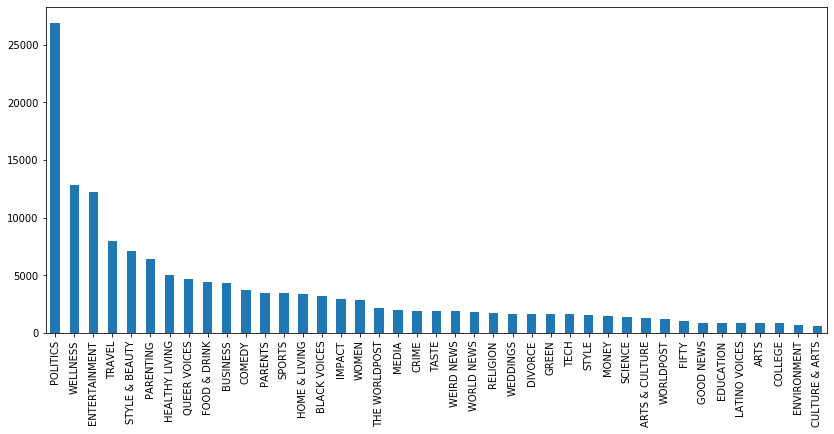

In [19]:
labels = list(df.category.unique())
labels.sort()
print(labels)
plt.figure(figsize=(14,6))
df.category.value_counts().plot(kind='bar')
plt.show()

Construimos el modelo (codigo extraido de https://www.kaggle.com/siddhantsadangi/classification-using-linearsvc-val-acc-64):

In [20]:
def prep_fit_pred(df, h_pct, l_pct, model, verbose=False):
    '''
    Takes the dataframe, and returns asset tag predictions for the stories

    Parameters
    ----------
    col : pandas.core.frame.DataFrame
    h_pct : float
        The percentage of high frequency words to remove from the corpus
    l_pct : float
        The percentage of low frequency words to remove from the corpus
    model : the model which will be used for predictions
    verbose : boolean (default: False)
        Verbosity of the output. True = all outputs, False = no outputs
            
    Returns
    -------
    preds : pandas.core.series.Series
        Column with the predicted asset class
    acc : float
        Accuracy of the predictions on the test set
    model : the trained model
    '''
    
    df['short_description_processed'] = preprocessing(df['short_description'],h_pct,l_pct)
    df['concatenated'] = df['headline'] + '\n' + df['short_description_processed']
    #not removing high and low frequency words from headline
    #this is because the headline carries more significance in determining the classification of the news
    df['concat_processed'] = preprocessing(df['concatenated'],0,0)
    
    if verbose:
        print('Number of words in corpus before processing: {}'
              .format(df['short_description'].apply(lambda x: len(x.split(' '))).sum()))
        print('Number of words in corpus after processing: {} ({}%)'
              .format(df['short_description_processed'].apply(lambda x: len(x.split(' '))).sum()
                     , round(df['short_description_processed'].apply(lambda x: len(x.split(' '))).sum()*100\
                             /df['short_description'].apply(lambda x: len(x.split(' '))).sum())))
        print('Number of words in final corpus: {} ({}%)'
              .format(df['concat_processed'].apply(lambda x: len(x.split(' '))).sum()
                     , round(df['concat_processed'].apply(lambda x: len(x.split(' '))).sum()*100\
                             /df['short_description'].apply(lambda x: len(x.split(' '))).sum())))

        print('\nRaw story:\n{}'.format(df['short_description'][indice]))
        print('\nProcessed story:\n{}'.format(df['short_description_processed'][indice]))
        print('\nAdding additional columns to story:\n{}'.format(df['concatenated'][indice]))
        print('\nFinal story:\n{}'.format(df['concat_processed'][indice]))

    X = df['concat_processed']
    y = df['category']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, 
                                                    stratify=y) 
    
    bow_xtrain = bow.fit_transform(X_train)
    bow_xtest = bow.transform(X_test)

    model.fit(bow_xtrain,y_train)
    preds = model.predict(bow_xtest)

    acc = accuracy_score(y_test,preds)*100
    
    print('type(preds): ', type(preds))
    print('len preds: ', len(preds))
    print('preds: ', preds)
    
    if verbose:
        print('\nPredicted class: {}'.format(preds[indice]))
        print('Actual class: {}\n'.format(y_test.iloc[indice]))
        plt.figure(figsize=(14,14))
        sns.heatmap(confusion_matrix(y_test,preds),cbar=False,annot=True,square=True
               ,xticklabels=labels,yticklabels=labels,fmt='d')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.yticks(rotation=0)
        plt.show()
        print(classification_report(y_test,preds))
        print('Accuracy: {0:.2f}%'.format(acc))

    return preds, acc, model

Esta función toma el dataframe, las palabras de alto y bajo porcentaje para eliminar, el modelo y un indicador de verbosidad como entradas, y devuelve las predicciones, la precisión del modelo y el modelo entrenado.

c:\users\nerve\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\nerve\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\nerve\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

Number of words in corpus before processing: 3350089
Number of words in corpus after processing: 1818457 (54.0%)
Number of words in final corpus: 2790008 (83.0%)

Raw story:
"We’re going to put them on this bus and send them home," boasts state Sen. Michael Williams.

Processed story:
r go put bus send home boast state sen michael williams

Adding additional columns to story:
Georgia GOP Gov. Candidate Wants To Round Up Immigrants In 'Deportation Bus'
r go put bus send home boast state sen michael williams

Final story:
georgia gop gov candid want round immigr deport bus r go put bus send home boast state sen michael william
type(preds):  <class 'numpy.ndarray'>
len preds:  49165
preds:  ['IMPACT' 'CRIME' 'SPORTS' 'STYLE & BEAUTY' ... 'MEDIA' 'ENTERTAINMENT' 'WELLNESS' 'SPORTS']

Predicted class: POLITICS
Actual class: POLITICS



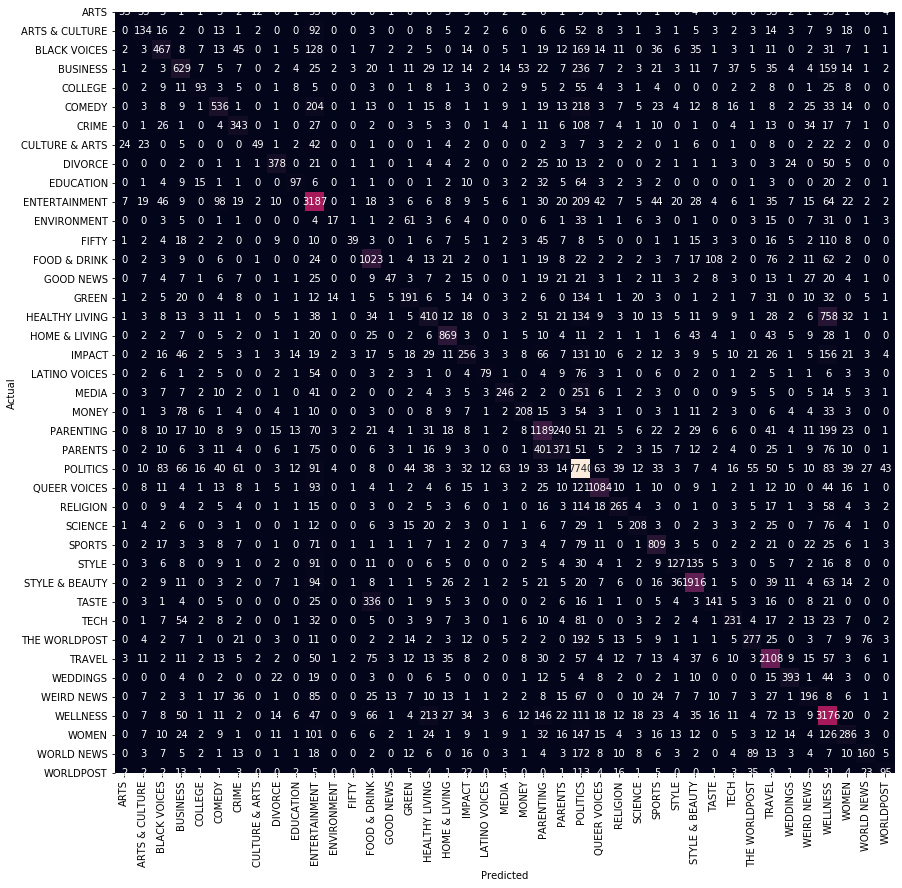

                precision    recall  f1-score   support

          ARTS       0.56      0.19      0.29       285
ARTS & CULTURE       0.40      0.31      0.35       431
  BLACK VOICES       0.56      0.43      0.49      1076
      BUSINESS       0.53      0.44      0.48      1426
       COLLEGE       0.49      0.33      0.39       284
        COMEDY       0.60      0.44      0.50      1224
         CRIME       0.54      0.53      0.54       647
CULTURE & ARTS       0.69      0.23      0.34       215
       DIVORCE       0.73      0.68      0.70       559
     EDUCATION       0.54      0.33      0.41       292
 ENTERTAINMENT       0.63      0.79      0.70      4023
   ENVIRONMENT       0.39      0.08      0.13       221
         FIFTY       0.51      0.11      0.19       344
  FOOD & DRINK       0.57      0.70      0.63      1456
     GOOD NEWS       0.45      0.16      0.23       303
         GREEN       0.43      0.34      0.38       555
HEALTHY LIVING       0.41      0.24      0.31  

In [21]:
preds_abc, acc_abc, abc = prep_fit_pred(df, 0, 1, LinearSVC(), verbose=True)

Podemos ver que una noticia que estaba dentro de la categoria 'POLITICS' es clasificada como 'POLITICS', sin embargo algunos titulares que llevan palabras como Trump pueden ser clasificadas en otras categorias comno 'ENTERTAINMENT'.

### ¿Existen estilos de escritura asociados a cada categoría?

Separamos 'category', 'headline' y 'short_description', en un nuevo dataset, y posteriormente creamos tres nuevos dataset para cada sub categoria popular.

In [22]:
text=df[['category', 'headline', 'short_description']].copy()
text_POLITICS=text[text['category']=='POLITICS']
text_ENTERTAINMENT=text[text['category']=='ENTERTAINMENT']
text_WELLNESS=text[text['category']=='WELLNESS']

Ahora procedemos a generar un grafico tipo 'WordCloud' para cada una de las categorias:

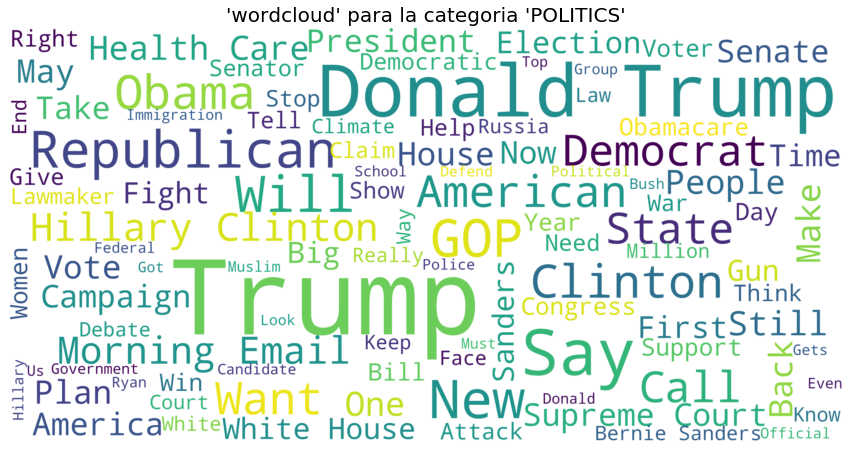

In [23]:
rcParams['figure.figsize'] = 15, 30
word_cloud_text_POLITICS = ''.join(text_POLITICS.headline)
wordcloud_POLITICS = WordCloud(max_font_size=100,
                               max_words=100,
                               background_color="white",\
                          scale = 10,
                               width=800,
                               height=400).generate(word_cloud_text_POLITICS)
plt.figure()
plt.imshow(wordcloud_POLITICS, interpolation="bilinear")
plt.axis("off")
plt.title("'wordcloud' para la categoria 'POLITICS'", fontsize=20)
plt.show()

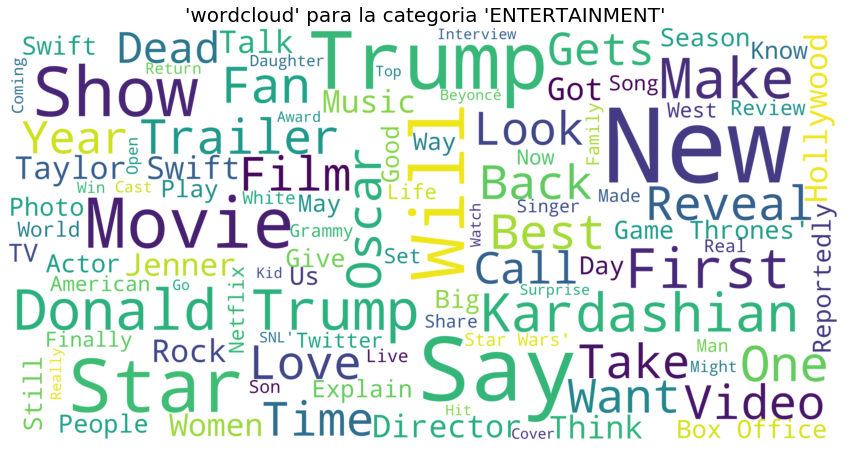

In [24]:
rcParams['figure.figsize'] = 15, 30
word_cloud_text_ENTERTAINMENT = ''.join(text_ENTERTAINMENT.headline)
wordcloud_ENTERTAINMENT= WordCloud(max_font_size=100,
                               max_words=100,
                               background_color="white",\
                          scale = 10,
                               width=800,
                               height=400).generate(word_cloud_text_ENTERTAINMENT)
plt.figure()
plt.imshow(wordcloud_ENTERTAINMENT, interpolation="bilinear")
plt.axis("off")
plt.title("'wordcloud' para la categoria 'ENTERTAINMENT'", fontsize=20)
plt.show()

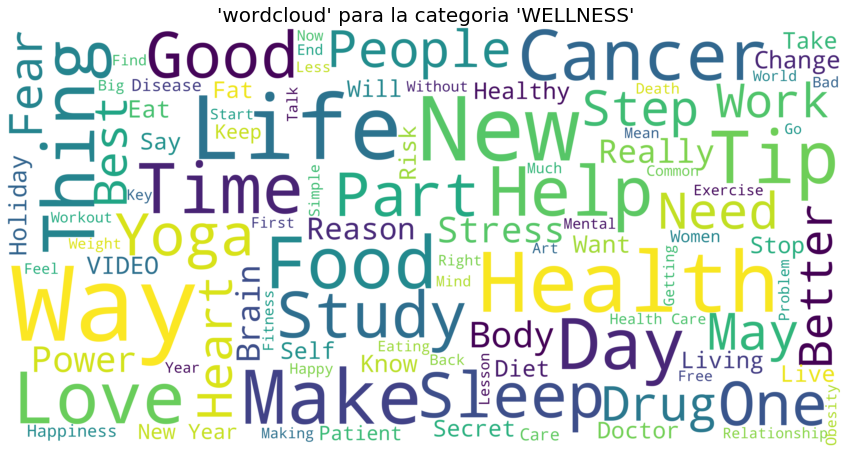

In [25]:
rcParams['figure.figsize'] = 15, 30
word_cloud_text_WELLNESS = ''.join(text_WELLNESS.headline)
wordcloud_WELLNESS= WordCloud(max_font_size=100,
                               max_words=100,
                               background_color="white",\
                          scale = 10,
                               width=800,
                               height=400).generate(word_cloud_text_WELLNESS)
plt.figure()
plt.imshow(wordcloud_WELLNESS, interpolation="bilinear")
plt.axis("off")
plt.title("'wordcloud' para la categoria 'WELLNESS'", fontsize=20)
plt.show()

Como se mencionó anteriormente, palabras como 'Trump', pueden aparecer muy frecuentemente en varias categorias por eso es importante mezclar palabras que den contexto a cada una de las categorias, por ejemplo para 'POLITICS', palabras como 'GOP' o 'law' pueden ayudar a dar contexto al articulo.

### ¿Qué se puede decir de los autores?

Describimos el dataset:

In [26]:
df.describe()

,category,headline,authors,link,short_description,date,short_description_processed,concatenated,concat_processed
count,148983,148983,148983,148983,148983,148983,148983,148983,148983
unique,41,148090,27135,148983,147061,2309,145213,148690,148663
top,POLITICS,Sunday Roundup,Lee Moran,https://www.huffingtonpost.com/entry/pharrell-...,We all need help maintaining our personal spir...,2017-08-17 00:00:00,,The 20 Funniest Tweets From Women This Week\nl...,funniest tweet women week ladi twitter never f...
freq,26913,90,2423,1,71,99,579,30,30
first,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2018-05-26 00:00:00,NaN,NaN,NaN


Agrupamos a los autores por temáticas:

In [27]:
df.groupby('category').count()

,headline,authors,link,short_description,date,short_description_processed,concatenated,concat_processed
category,,,,,,,,
ARTS,863,863,863,863,863,863,863,863
ARTS & CULTURE,1307,1307,1307,1307,1307,1307,1307,1307
BLACK VOICES,3260,3260,3260,3260,3260,3260,3260,3260
BUSINESS,4320,4320,4320,4320,4320,4320,4320,4320
COLLEGE,860,860,860,860,860,860,860,860
COMEDY,3709,3709,3709,3709,3709,3709,3709,3709
CRIME,1960,1960,1960,1960,1960,1960,1960,1960
CULTURE & ARTS,651,651,651,651,651,651,651,651
DIVORCE,1695,1695,1695,1695,1695,1695,1695,1695


De las dos tablas anteriores, podemos indicar que el tema con más articulos es 'POLITICS' con 26913 titulares y el autor co más articulos es 'Lee Moran'. Tambien cabe resaltar que hay 27135 autores unicos por lo cual no es practico analizarlos por separado.

Volviendo a los autores a continuación mostramos los 10 autores con más articulos:

In [28]:
df_top_authors=df.groupby('authors')['authors'].count().sort_values(ascending=False).head(10)
df_top_authors

authors
Lee Moran            2423
Ron Dicker           1762
Reuters, Reuters     1562
Ed Mazza             1194
Cole Delbyck         1140
Julia Brucculieri    1054
Andy McDonald        1002
Mary Papenfuss        974
Carly Ledbetter       962
Curtis M. Wong        890
Name: authors, dtype: int64

Y los autores con menos articulos:

In [29]:
df.groupby('authors')['authors'].count().sort_values(ascending=False).tail(10)

authors
Jen Schwartz , ContributorCo-Founder, MOTHERHOOD | UNDERSTOOD; Creator of the blog, The ...           1
Jen Retter, Quiet Revolution                                                                          1
Jen Remauro, Contributor\nComedian, Writer                                                            1
Rabbi Arthur Waskow, ContributorFounder (1983) and director, The Shalom Center                        1
Jen Reeder, Contributor\nFreelance journalist and founder of Rock 1 Kidney                            1
Jen Nedeau, ContributorMedia and Communications Expert                                                1
Jen Moser, ContributorMom, Wife, Wellness Coach, Energy Healer and Stay-at-Home Entr...               1
Rabbi Berel Lerman, Contributor\nDirector, SpiritualityForAll.org and Chabad North Haven in The...    1
Rabbi Berel Lerman, ContributorDirector, SpiritualityForAll.org and Chabad North Haven in The...      1
 Basil Kreimendahl, Contributor\nPlaywright             

De donde concluimos que son solamente contribuidores.

Ahora procedemos a analizar los 10 autores con más publicaciones.

In [30]:
#Primero creamos un dataframe vacio
df_article_top_author=pd.DataFrame(index=df.groupby('category').count().index, columns=df_top_authors.index)

Asignamos el numero de publicaciones a cada autor segun su categoría.

In [31]:
for i in df_top_authors.index:
    df_article_top_author[i]=df[df.authors==i].groupby('category').count()

In [32]:
#Llenamos con ceros los espacios nulos
df_article_top_author.replace(np.nan, 0, inplace=True)

Mostramos la tabla:

In [33]:
df_article_top_author

authors,Lee Moran,Ron Dicker,"Reuters, Reuters",Ed Mazza,Cole Delbyck,Julia Brucculieri,Andy McDonald,Mary Papenfuss,Carly Ledbetter,Curtis M. Wong
category,,,,,,,,,,
ARTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARTS & CULTURE,41.0,3.0,0.0,6.0,3.0,5.0,4.0,6.0,1.0,6.0
BLACK VOICES,29.0,38.0,23.0,11.0,0.0,0.0,13.0,5.0,1.0,4.0
BUSINESS,2.0,12.0,294.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0
COLLEGE,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
COMEDY,779.0,383.0,0.0,278.0,9.0,15.0,794.0,66.0,4.0,0.0
CRIME,92.0,39.0,45.0,47.0,0.0,0.0,0.0,61.0,0.0,0.0
CULTURE & ARTS,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
DIVORCE,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Graficamos con un mapa de calor:

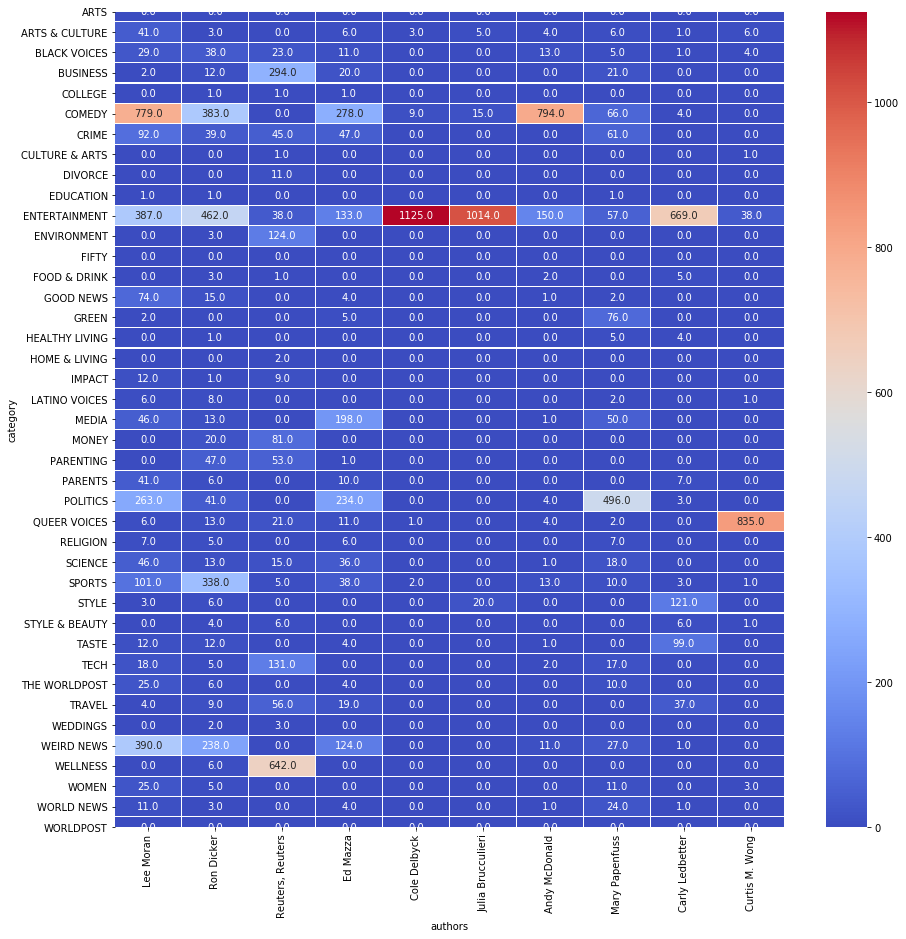

In [34]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_article_top_author,
            cmap='coolwarm',
            annot=True,
            fmt=".1f",
            linewidths=.1,
            ax=ax)

De la gráfica anterior a pesar de que 'Lee Moran' tiene más articulos, 'Cole Delbyck' y 'Julia Brucculieri', tienen una mayor cantidad de articulos centrandose mayoritariamente en la categoria 'ENTERTAIMENT'.

### ¿Qué información útil se puede extraer de los datos?

El dataset posee tambien una columna fecha, que puede ayudar a determinar que articulos son más comunes segun la fecha, esto puede ser importante ya que los lectores pueden tender más a leer articulos de la categoría 'POLITICS' en temporadas electorales por ejemplo.

Tambíen se pueden extraer palabras clave como nombres de políticos, para conocer su popularidad y que tipo de titulares pueden inspirar.

### BIBLIOGRAFÍA

@dataset{dataset,

author = {Misra, Rishabh},

year = {2018},

month = {06},

pages = {},

title = {News Category Dataset},

doi = {10.13140/RG.2.2.20331.18729}

}